In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
os.chdir("/cluster/work/schneider/rethink/jose/xaibench_tf")


In [3]:
from xaibench.utils import DATA_PATH

In [8]:
import numpy as np

pairs = glob(os.path.join(DATA_PATH, "validation_sets", "*", "pairs.csv"))
psizes = np.array([len(pd.read_csv(p)) for p in pairs])


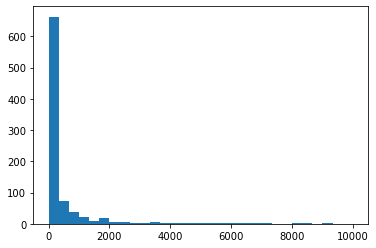

In [9]:
plt.hist(psizes, bins=30, range=[0, 10000])
plt.show()

In [14]:
from tqdm import tqdm
tsizes = []
exists_idx = []

for idx, pair in enumerate(tqdm(pairs)):
    t_path = os.path.join(os.path.dirname(pair), "training.csv")
    if os.path.exists(t_path):
        train_df = pd.read_csv(t_path)
        tsizes.append(len(train_df))
        exists_idx.append(idx)

tsizes = np.array(tsizes)

100%|██████████| 897/897 [00:04<00:00, 183.84it/s]


(array([108., 104.,  43.,  80.,  61.,  40.,  34.,  80.,  27.,  63.,  14.,
         18.,   6.,   0.,   2.,   0.,  11.,   4.,  39.,   2.,   3.,   1.,
          0.,   0.,   4.,   0.,   0.,   0.,   0.,   1.]),
 array([  103.        ,   675.03333333,  1247.06666667,  1819.1       ,
         2391.13333333,  2963.16666667,  3535.2       ,  4107.23333333,
         4679.26666667,  5251.3       ,  5823.33333333,  6395.36666667,
         6967.4       ,  7539.43333333,  8111.46666667,  8683.5       ,
         9255.53333333,  9827.56666667, 10399.6       , 10971.63333333,
        11543.66666667, 12115.7       , 12687.73333333, 13259.76666667,
        13831.8       , 14403.83333333, 14975.86666667, 15547.9       ,
        16119.93333333, 16691.96666667, 17264.        ]),
 <BarContainer object of 30 artists>)

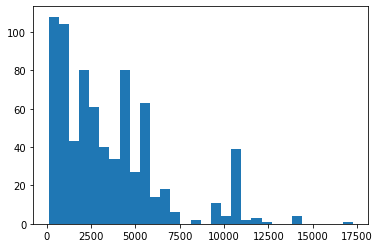

In [15]:
plt.hist(tsizes, bins=30)

In [17]:
psizes_ = psizes[exists_idx]

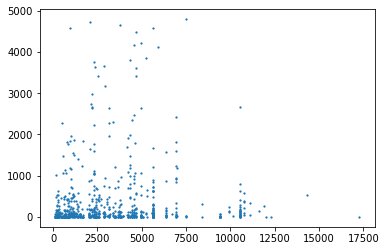

In [18]:
plt.scatter(tsizes[psizes_ < 5000], psizes_[psizes_ < 5000], s=1.5)

In [19]:
np.corrcoef(tsizes, psizes_)

array([[1.        , 0.14049988],
       [0.14049988, 1.        ]])